     0    1    2    3    4    5    6    7    8    9   ...   20   21   22   23  \
0  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -0.5 -0.5 -0.5 -0.5   
1  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -0.5 -0.5 -0.5 -0.5   
2  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -0.5 -0.5 -0.5 -0.5   
3  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -0.5 -0.5 -0.5 -0.5   
4  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -0.5 -0.5 -0.5 -0.5   
5  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0  ... -0.5 -0.5 -0.5 -0.5   
6  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.5  ... -0.5 -0.5 -0.5 -0.5   
7  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.5 -0.5  ... -0.5 -0.5 -0.5  0.0   
8  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.5 -0.5 -0.5  ... -0.5 -0.5  0.0  0.0   
9  -1.0 -1.0 -1.0 -1.0 -1.0 -1.0 -0.5 -0.5 -0.5 -0.5  ... -0.5  0.0  0.0  0.0   
10 -1.0 -1.0 -1.0 -1.0 -1.0 -0.5 -0.5 -0.5 -0.5 -0.5  ...  0.0  0.0  0.0  0.0   
11 -1.0 -1.0 -1.0 -1.0 -0.5 

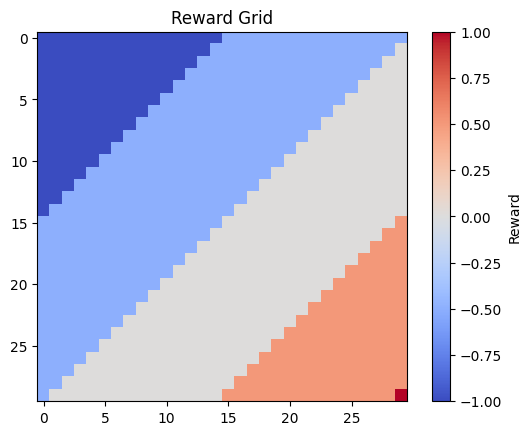

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def reward_shaping(n, num_bins, reward_range=(-1, 1)):
    # Initialize the grid with zeros
    rewards = np.zeros((n, n))
    # Coordinates of the goal
    goal = (n-1, n-1)
    
    # Calculate maximum distance in the grid (Manhattan distance)
    max_distance = (goal[0] - 0) + (goal[1] - 0)
    
    # Calculate distances for each cell from the goal (Manhattan distance)
    distances = np.zeros((n, n))
    for i in range(n):
        for j in range(n):
            distances[i, j] = abs(goal[0] - i) + abs(goal[1] - j)
            #distances[i,j] = np.sqrt((goal[0] - i)**2 + (goal[1] - j)**2)
    
    # Determine bin edges
    bin_edges = np.linspace(0, max_distance, num_bins + 1)

    # Flip the bin, the lower the distance, the higher the reward
    bin_edges = np.flip(bin_edges)
    
    # Calculate rewards for each bin using linear interpolation
    bin_rewards = np.linspace(reward_range[0], reward_range[1], num_bins+1)
    

    # Assign rewards based on bins
    for i in range(n):
        for j in range(n):
            distance = distances[i, j]
            bin_index = np.digitize(distance, bin_edges, right=False)-1   # -1 because np.digitize starts from 1
            bin_index = max(0, bin_index)  # Ensure bin_index is within range [0, num_bins-1]
            rewards[i, j] = bin_rewards[bin_index]
    
    # Set reward for the goal cell
    rewards[goal[0], goal[1]] = reward_range[1]
    
    return rewards


n = 30 
num_bins = 4 
reward_range = (-1, 1) 
rewards = reward_shaping(n, num_bins, reward_range)


reward_df = pd.DataFrame(rewards)
print(reward_df)

plt.imshow(rewards, cmap='coolwarm', interpolation='none')
plt.colorbar(label='Reward')
plt.title('Reward Grid')
plt.show()
